# Python for Finance

In [1]:
#  Some required packages
# ! pip install mpl-finance
# ! pip install yfinance
# ! pip install fix-yahoo-finance

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Importing Data

In [3]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

C:\Users\yagarwal\Anaconda\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,7.103626
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,7.029610
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,7.152968
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,7.100781
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,7.042896


The `pandas_datareader` offers a lot of possibilities to get financial data. If you don't want to make use of this package, however, you can also use Quandl to retrieve data:

In [4]:
# import quandl 
# aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
# aapl.head()

### Working With Time Series Data

In [5]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [6]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-11-01  11.625714  11.194285  11.585714  11.308572  152798100   7.511662
2006-11-02  11.331429  11.214286  11.274285  11.282857  116370800   7.494581
2006-11-03  11.361428  11.112857  11.337143  11.184286  107972200   7.429106
2006-11-06  11.437143  11.204286  11.278571  11.387143  108644200   7.563855
2006-11-07  11.571428  11.447143  11.492857  11.501429  131483100   7.639767
                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-01-03  12.368571  11.700000  12.327143  11.971429  309579900   7.951960
2007-01-04  12.278571  11.974286  12.007143  12.237143  211815100   8.128461
2007-01-05  12.314285  12.057143  12.252857  12.150000  208685400   8.070577
2007-01-08  12.361428  12.182858  12.280000  12.210000  199276700   8.110430

In [7]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
# print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]


In [8]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close
# aapl.head()

# Add a column `maxdiff` to `aapl` 
aapl['max_diff'] = aapl.High - aapl.Low
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,diff,max_diff
Date,,,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,7.103626,0.034286,0.224286
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,7.029610,0.052857,0.251429
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,7.152968,-0.182858,0.328571
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,7.100781,-0.042857,0.290000
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,7.042896,0.028571,0.175714


In [9]:
# Delete the new `diff` column
del aapl['diff']

# Delete the new `maxdiff` column
del aapl['max_diff']

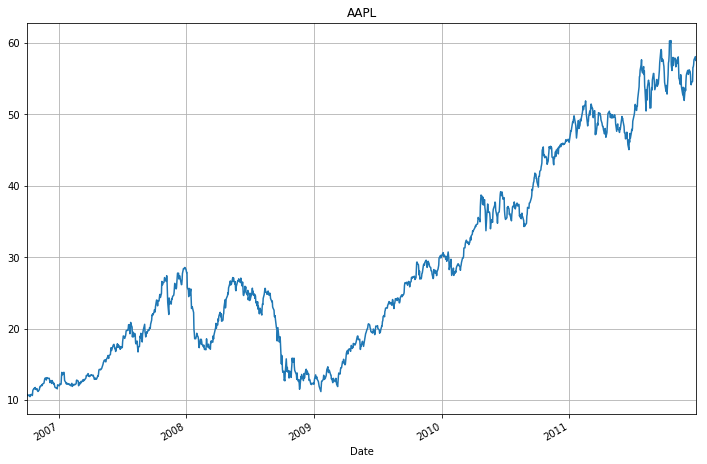

In [10]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True, title='AAPL', figsize=(12,8))

# Show the plot
plt.show()

## Financial Analysis
### Returns

In [11]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014722
2006-10-18   0.003231
2006-10-19   0.059842
2006-10-20   0.012153
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006243
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010036
2006-11-08   0.024096
2006-11-09   0.010794
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007764
2011-11-30   0.024116
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008494
2011-12-06

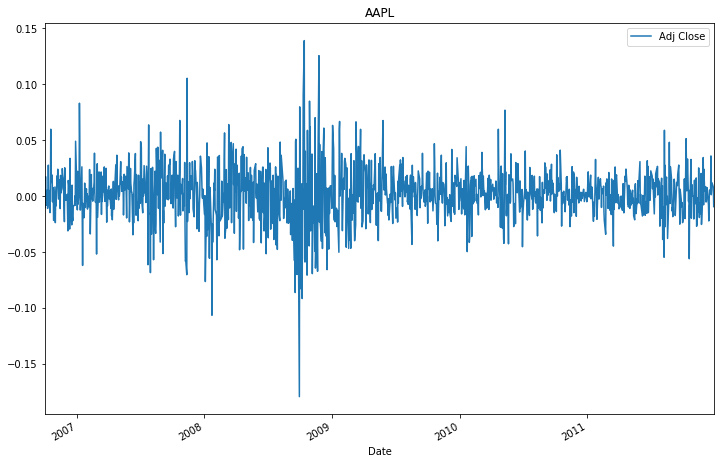

In [12]:
daily_pct_c.plot(title='AAPL', figsize=(12,8))

In [13]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,0.134672,0.134987,0.132106,0.130488,0.735854,0.130489
2006-12-29,-0.078550,-0.084560,-0.089578,-0.074405,0.236584,-0.074406
2007-01-31,0.007026,0.011876,0.010840,0.010490,-0.204714,0.010490
2007-02-28,-0.004651,-0.016005,-0.021918,-0.013064,0.074066,-0.013064
2007-03-30,0.106075,0.117470,0.135904,0.098097,-0.346847,0.098097
2007-04-30,0.066751,0.074609,0.061625,0.074158,0.026561,0.074158
2007-05-31,0.209604,0.199358,0.199620,0.214329,1.103887,0.214329
2007-06-29,0.014979,0.012966,0.015824,0.007014,-0.122758,0.007014


In [14]:

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("3M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-31,0.130579,0.124445,0.129591,0.126389,0.452239,0.126389
2007-04-30,0.034003,0.039993,0.035453,0.037156,-0.256056,0.037156
2007-07-31,0.357706,0.347572,0.354985,0.353929,0.429955,0.353929
2007-10-31,0.215316,0.211005,0.213942,0.215416,0.044101,0.215416
2008-01-31,0.190972,0.176306,0.186964,0.179828,0.202145,0.179828
2008-04-30,-0.210502,-0.205216,-0.211859,-0.207104,-0.102334,-0.207104
2008-07-31,0.271823,0.275910,0.276554,0.275043,-0.206476,0.275043
2008-10-31,-0.220860,-0.237426,-0.227803,-0.231379,0.338282,-0.231379


In [15]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014722
2006-10-18   0.003231
2006-10-19   0.059842
2006-10-20   0.012153
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006243
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010036
2006-11-08   0.024096
2006-11-09   0.010794
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007764
2011-11-30   0.024116
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008494
2011-12-06

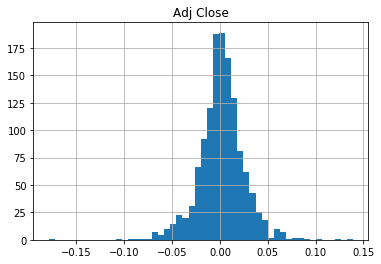

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139050


In [16]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [17]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999600
2006-10-06   0.991451
2006-10-09   0.996928
2006-10-10   0.985974
2006-10-11   0.978226
2006-10-12   1.005343
2006-10-13   1.002137
2006-10-16   1.007213
2006-10-17   0.992386
2006-10-18   0.995592
2006-10-19   1.055170
2006-10-20   1.067993
2006-10-23   1.088165
2006-10-24   1.082688
2006-10-25   1.091104
2006-10-26   1.097916
2006-10-27   1.074138
2006-10-30   1.074272
2006-10-31   1.083088
2006-11-01   1.057441
2006-11-02   1.055036
2006-11-03   1.045819
2006-11-06   1.064788
2006-11-07   1.075474
2006-11-08   1.101389
2006-11-09   1.113278
2006-11-10   1.110339
...               ...
2011-11-17   5.041545
2011-11-18   5.008550
2011-11-21   4.929334
2011-11-22   5.029521
2011-11-23   4.902350
2011-11-25   4.856667
2011-11-28   5.024312
2011-11-29   4.985305
2011-11-30   5.105530
2011-12-01   5.182073
2011-12-02   5.205717
2011-12-05   5.249933
2011-12-06

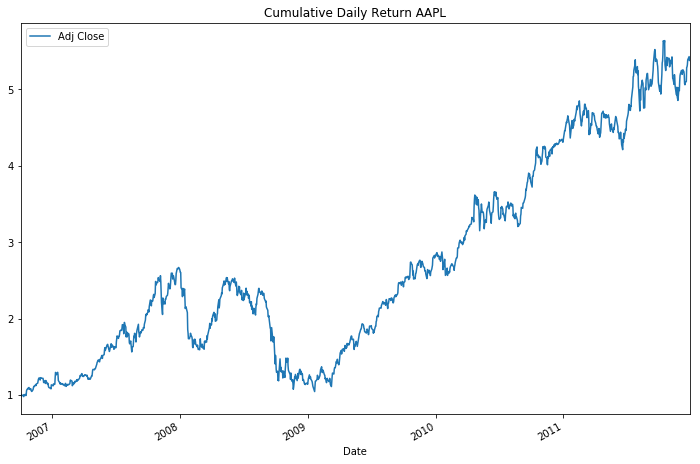

In [18]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8), title='Cumulative Daily Return AAPL')

# Show the plot
plt.show()

In [19]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
2007-03-31   1.210302
2007-04-30   1.251737
2007-05-31   1.453453
2007-06-30   1.625638
2007-07-31   1.818073
2007-08-31   1.734484
2007-09-30   1.897943
2007-10-31   2.295090
2007-11-30   2.333130
2007-12-31   2.544817
2008-01-31   2.142374
2008-02-29   1.671828
2008-03-31   1.747569
2008-04-30   2.113108
2008-05-31   2.468067
2008-06-30   2.384260
2008-07-31   2.240831
2008-08-31   2.285193
2008-09-30   1.886766
2008-10-31   1.322521
2008-11-30   1.254883
2008-12-31   1.222865
2009-01-31   1.185880
2009-02-28   1.256669
2009-03-31   1.302498
...               ...
2009-07-31   1.994633
2009-08-31   2.221219
2009-09-30   2.374922
2009-10-31   2.575893
2009-11-30   2.675929
2009-12-31   2.657688
2010-01-31   2.774716
2010-02-28   2.655568
2010-03-31   2.984383
2010-04-30   3.354910
2010-05-31   3.359090
2010-06-30   3.488451
2010-07-31

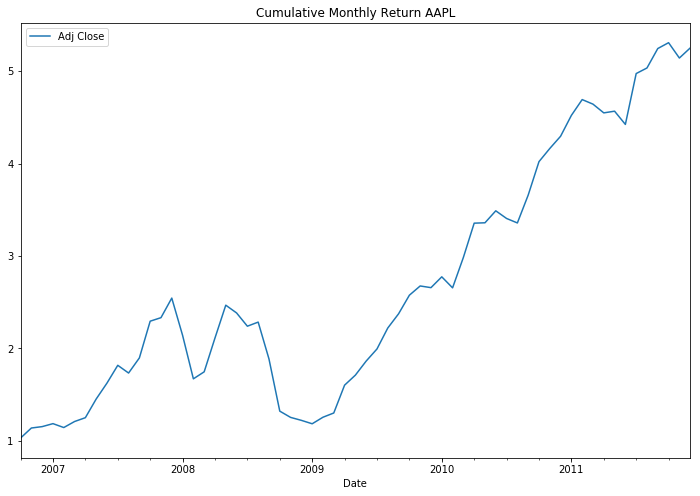

In [20]:
cum_monthly_return.plot(figsize=(12,8), title='Cumulative Monthly Return AAPL')

In [21]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']

all_data = get(tickers, pd.datetime(2006,10,1), pd.datetime(2016,10,1))
all_data.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800.0   
       2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200.0   
       2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700.0   
       2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800.0   
       2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700.0   

                   Adj Close  
Ticker Date                   
AAPL   2006-10-02   9.368505  
       2006-10-03   9.270888  
       2006-10-04   9.433582  
       2006-10-05   9.364749  
       2006-10-06   9.288410

In [22]:
# FOr Pivot the sequence of elements to be passed: Index, Column, Values
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
daily_close_px

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-02,9.368505,199.422943,58.133286,20.450928
2006-10-03,9.270888,200.714539,57.977074,20.458405
2006-10-04,9.433582,206.506866,59.006664,20.884464
2006-10-05,9.364749,204.574448,58.878849,20.869520
2006-10-06,9.288410,208.891357,59.035076,20.832148
2006-10-09,9.339723,213.113907,59.645737,20.720016
2006-10-10,9.237102,211.946487,59.780628,20.697594
2006-10-11,9.164515,211.871979,59.780628,20.585484
2006-10-12,9.418566,212.338943,60.142769,21.093765


In [23]:
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.head()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-02,NaN,NaN,NaN,NaN
2006-10-03,-0.010420,0.006477,-0.002687,0.000366
2006-10-04,0.017549,0.028859,0.017759,0.020826
2006-10-05,-0.007297,-0.009358,-0.002166,-0.000716
2006-10-06,-0.008152,0.021102,0.002653,-0.001791


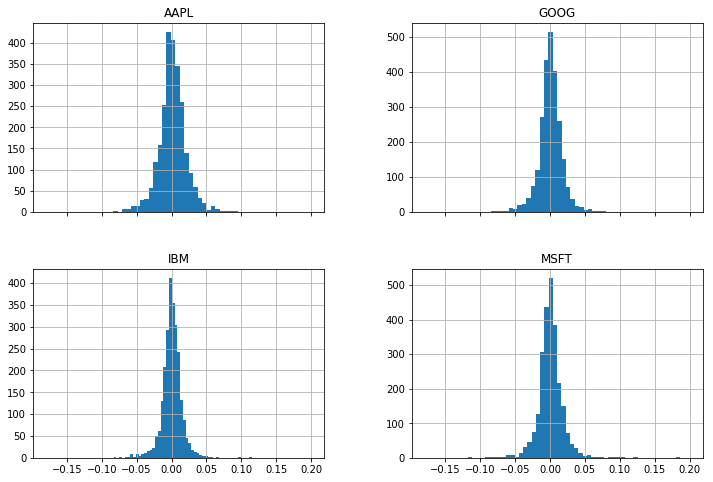

In [24]:
# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

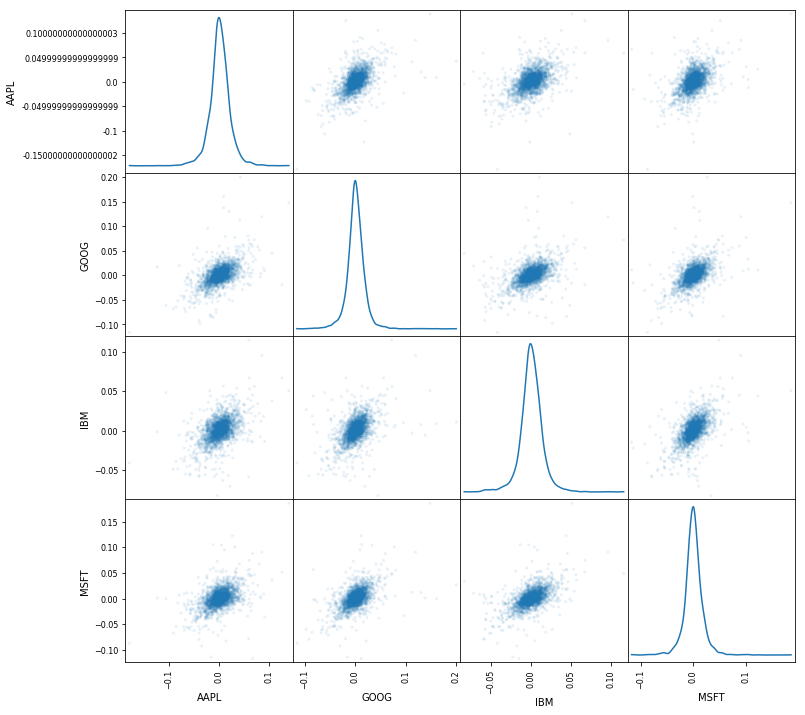

In [25]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

### Moving Windows

In [26]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[40:50]

Date
2006-11-28    7.664177
2006-11-29    7.706215
2006-11-30    7.744836
2006-12-01    7.783955
2006-12-04    7.824047
2006-12-05    7.863522
2006-12-06    7.901527
2006-12-07    7.934288
2006-12-08    7.965128
2006-12-11    7.997700
Name: Adj Close, dtype: float64

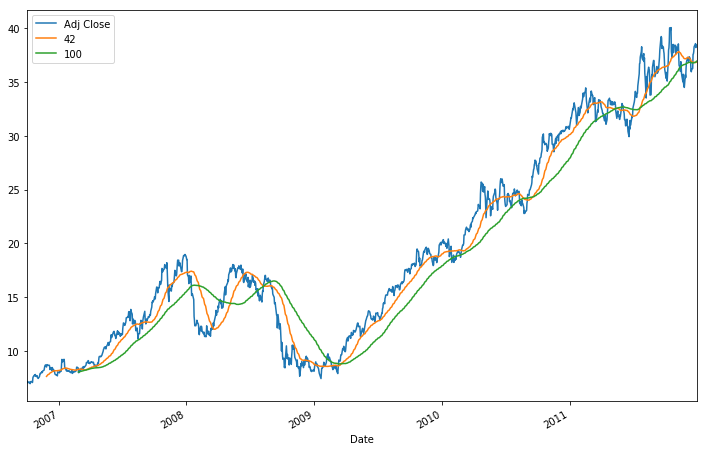

In [27]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['100'] = adj_close_px.rolling(window=100).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '100']].plot(figsize=(12,8))

plt.show()

### Volatility Calculation

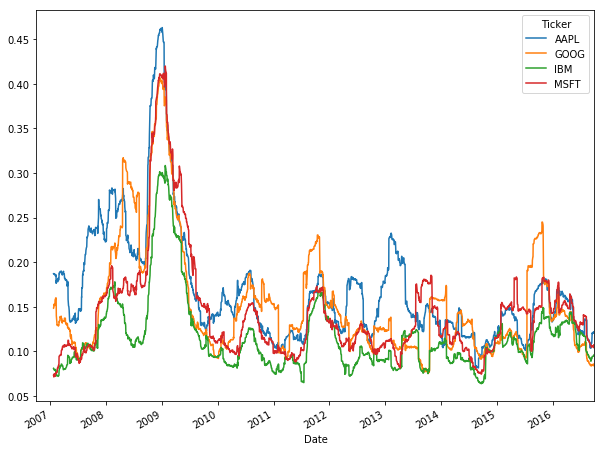

In [28]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))
# vol.plot(figsize=(10, 8), subplots=True, sharex=True)

# Show the plot
plt.show()